In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [174]:
df=pd.read_csv('../data/customer_data.csv')

In [175]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,고객 평생 가치,고객 그룹,구매 시즌,구매 요일,고객 충성도 지수,등급
0,1,강주온,2002.3.4,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,신용카드,오프라인,1,0,779930,EVC,봄,3,38,이탈가능
1,2,김경수,1983.1.2,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,신용카드,오프라인,5,0,23907120,EVC,겨울,0,99,vip
2,3,김다은,1999.5.2,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,계좌이체,오프라인,1,0,3442560,EVC,봄,0,60,신규
3,4,김민수,1960.7.1,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,현금,오프라인,1,0,1793050,EVC,봄,0,33,이탈가능
4,5,김승현,1970.3.2,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,신용카드,오프라인,1,0,1618320,EVC,가을,6,35,이탈가능
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958.7.11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,신용카드,온라인,2,0,907252920,BVC,겨울,4,72,일반
287,289,최춘자,1976.6.27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,현금,오프라인,3,0,1063859600,BVC,여름,3,62,일반
288,290,차서준,1968.1.22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,계좌이체,온라인,2,0,950938230,BVC,겨울,4,50,이탈가능
289,291,안정희,1984.1.10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,현금,온라인,2,0,1226832750,BVC,겨울,1,45,이탈가능


In [176]:
# 결측치 확인
df.isna().sum()

연번                 0
이름                 0
생년월일               0
현재 나이              0
연령대                0
성별                 0
휴대폰 번호             0
이메일                0
고객 구분              0
아이디                0
가입일                0
가입 이후 경과 기간        0
주소                 0
거주 지역              0
인구 밀도              0
GDP (조 원)          0
1인당 GDP (만 원)      0
고객 등급              0
회원가입 이후 구매 이력      0
최근 구매 제품           0
차량 사이즈             0
차량 유형              0
연료 구분              0
차량 연비              0
최대 출력              0
배기량                0
모델 사진              0
최근 구매 날짜           0
최근 구매 연도           0
최근 구매 시즌           0
최근 구매 시점           0
최근 구매 요일           0
마지막 구매 이후 경과 기간    0
최근 구매 당시 나이        0
최근 거래 금액           0
누적 구매 금액           0
평균 구매 금액           0
할부 여부              0
선호 거래 방식           0
선호 구매 경로           0
차량 구매 횟수           0
신차 구매 지수           0
고객 평생 가치           0
고객 그룹              0
구매 시즌              0
구매 요일              0
고객 충성도 지수          0
등급           

In [177]:
# 고객 그룹화 다시해 보기
# 사용할 데이터 : 차량 유형, 최근 거래 금액, 누적 구매 금액, 평균 구매 금액, 차량 구매 횟수, 고객 충성도 지수
X=df[['차량 유형','최근 거래 금액','누적 구매 금액','평균 구매 금액','차량 구매 횟수','고객 충성도 지수']]

In [178]:
X

,차량 유형,최근 거래 금액,누적 구매 금액,평균 구매 금액,차량 구매 횟수,고객 충성도 지수
0,세단,33910000,33910000,51586471,1,38
1,세단,84180000,84180000,61140833,5,99
2,SUV,71720000,71720000,47520000,1,60
3,SUV,51230000,51230000,57152308,1,33
4,세단,49040000,49040000,53551538,1,35
...,...,...,...,...,...,...
286,세단,89230000,819560000,58540000,2,72
287,세단,38690000,724700000,51764286,3,62
288,SUV,71140000,839310000,64562308,2,50
289,세단,83950000,953250000,52958333,2,45


In [179]:
# 차량 유형 레이블 인코딩
encoder=LabelEncoder()
X['차량 유형']=encoder.fit_transform(X['차량 유형'])

/var/folders/6y/dhcn_x315mxfr5mf45wd9ctw0000gp/T/ipykernel_11840/807637023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['차량 유형']=encoder.fit_transform(X['차량 유형'])


In [180]:
X

,차량 유형,최근 거래 금액,누적 구매 금액,평균 구매 금액,차량 구매 횟수,고객 충성도 지수
0,1,33910000,33910000,51586471,1,38
1,1,84180000,84180000,61140833,5,99
2,0,71720000,71720000,47520000,1,60
3,0,51230000,51230000,57152308,1,33
4,1,49040000,49040000,53551538,1,35
...,...,...,...,...,...,...
286,1,89230000,819560000,58540000,2,72
287,1,38690000,724700000,51764286,3,62
288,0,71140000,839310000,64562308,2,50
289,1,83950000,953250000,52958333,2,45


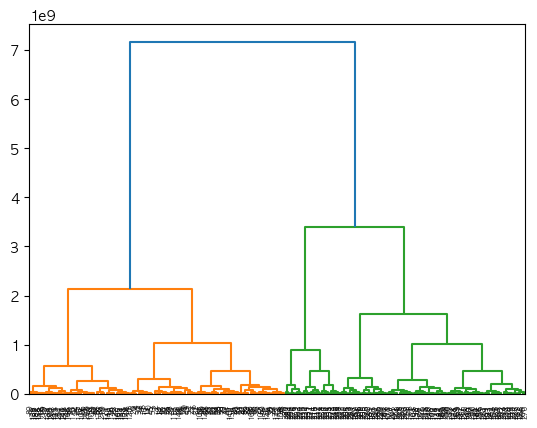

In [181]:
# 최적의 클러스트 갯수 확인
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(X,method='ward'))
plt.show()

In [182]:
# 클러스터링 갯수 5개
from sklearn.cluster import AgglomerativeClustering


In [183]:
hc=AgglomerativeClustering(n_clusters=5)

In [184]:
y_pred=hc.fit_predict(X)

In [185]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 3, 0, 3,
       3, 3, 1, 3, 3, 0, 3, 0, 3, 3, 3, 3, 1, 1, 0, 3, 0, 3, 3, 3, 0, 3,
       1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 3, 3, 3, 1, 3, 0, 1, 0, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 0, 0, 3, 3, 1, 1, 4, 1, 0, 1,
       1, 3, 0, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 3, 1, 3, 1, 1, 0, 1, 3,
       3, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 3, 1, 4, 1, 4, 3, 1, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 3, 4, 4, 4, 1, 3, 4, 1, 3, 1, 3, 2, 2, 2, 2, 1, 3,
       1, 2, 4, 4, 2, 1, 1, 4, 2, 1, 2, 2, 2, 1, 2, 2, 2, 4, 1, 4, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 2, 4, 2, 1, 2, 2, 4, 1, 3, 1, 4, 4, 2, 2, 1,
       1, 4, 2, 1, 2, 1, 1, 1, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 1, 2, 2, 4,
       1, 1, 1, 4, 1])

In [186]:
df['group']=y_pred

In [187]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,선호 구매 경로,차량 구매 횟수,신차 구매 지수,고객 평생 가치,고객 그룹,구매 시즌,구매 요일,고객 충성도 지수,등급,group
0,1,강주온,2002.3.4,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,오프라인,1,0,779930,EVC,봄,3,38,이탈가능,0
1,2,김경수,1983.1.2,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,오프라인,5,0,23907120,EVC,겨울,0,99,vip,0
2,3,김다은,1999.5.2,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,오프라인,1,0,3442560,EVC,봄,0,60,신규,0
3,4,김민수,1960.7.1,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,오프라인,1,0,1793050,EVC,봄,0,33,이탈가능,0
4,5,김승현,1970.3.2,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,오프라인,1,0,1618320,EVC,가을,6,35,이탈가능,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958.7.11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,온라인,2,0,907252920,BVC,겨울,4,72,일반,1
287,289,최춘자,1976.6.27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,오프라인,3,0,1063859600,BVC,여름,3,62,일반,1
288,290,차서준,1968.1.22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,온라인,2,0,950938230,BVC,겨울,4,50,이탈가능,1
289,291,안정희,1984.1.10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,온라인,2,0,1226832750,BVC,겨울,1,45,이탈가능,4


In [188]:
k=5
kmeans=KMeans(n_clusters=k,random_state=42)
kmeans.fit(X)
labels=kmeans.labels_
centers=kmeans.cluster_centers_

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [189]:
# 데이터프레임에서 필요한 열 추출
x = df['최근 거래 금액']  # X축 변수
y = df['누적 구매 금액']  # Y축 변수
clusters = df['group']    # 클러스터 라벨

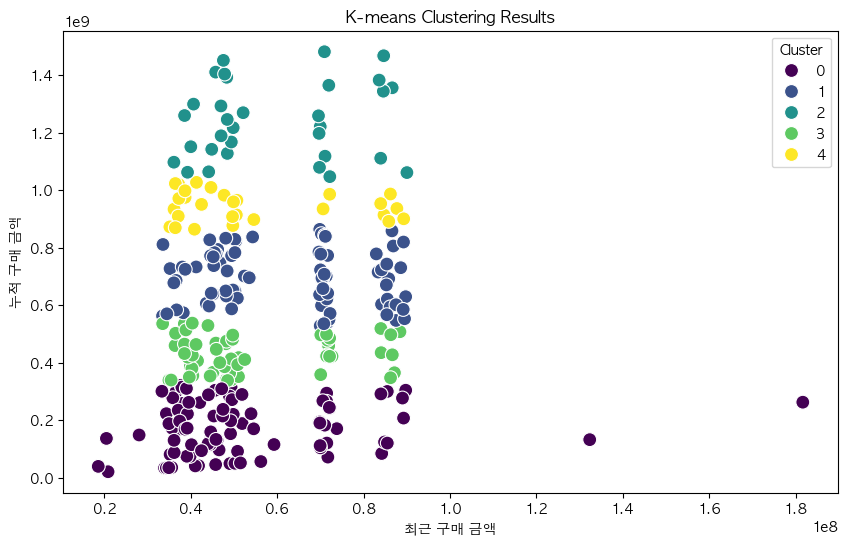

In [190]:
# 산점도 시각화
plt.figure(figsize=(10, 6))
sb.scatterplot(x=x, y=y, hue=clusters, palette='viridis', s=100)
plt.title('K-means Clustering Results')
plt.xlabel('최근 구매 금액')
plt.ylabel('누적 구매 금액')
plt.legend(title='Cluster')
plt.show()

### 누적 구매 금액','고객 충성도 지수','차량 구매 횟수','고객 평생 가치'로 클러스터링

In [191]:
# 누적 구매 금액, 고객 충성도 지수, 차량 구매 횟수, 고객 평생 가치
dt=df[['누적 구매 금액','고객 충성도 지수','차량 구매 횟수','고객 평생 가치']]

In [192]:
scaler=StandardScaler()
scaled_fetures=scaler.fit_transform(dt)

In [193]:
# 최적의 클러스터링 갯수 찾기
inertia=[]
K_range=range(2,10)

In [194]:
for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(scaled_fetures)
    inertia.append(kmeans.inertia_)

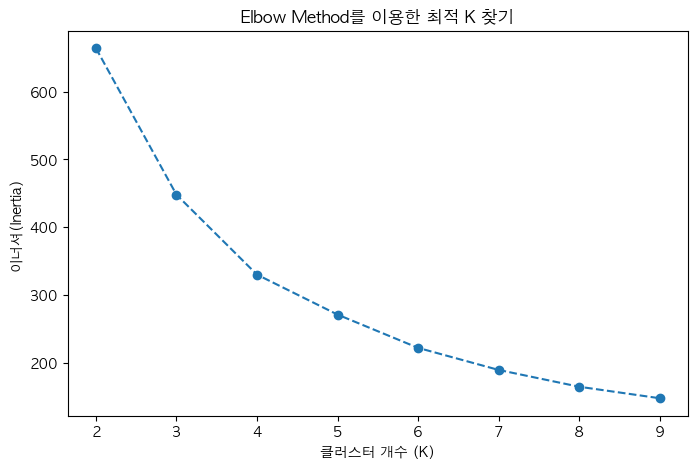

In [195]:
# 시각화
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('클러스터 개수 (K)')
plt.ylabel('이너셔(Inertia)')
plt.title('Elbow Method를 이용한 최적 K 찾기')
plt.show()

In [196]:
# 최적의 클러스터 갯수로 k-means 실행
optimal_k=5
kmeans=KMeans(n_clusters=optimal_k,random_state=42,n_init=10)

In [197]:
df['클러스터'] = kmeans.fit_predict(scaled_fetures)

In [198]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,차량 구매 횟수,신차 구매 지수,고객 평생 가치,고객 그룹,구매 시즌,구매 요일,고객 충성도 지수,등급,group,클러스터
0,1,강주온,2002.3.4,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,1,0,779930,EVC,봄,3,38,이탈가능,0,1
1,2,김경수,1983.1.2,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,5,0,23907120,EVC,겨울,0,99,vip,0,0
2,3,김다은,1999.5.2,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,1,0,3442560,EVC,봄,0,60,신규,0,1
3,4,김민수,1960.7.1,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,1,0,1793050,EVC,봄,0,33,이탈가능,0,1
4,5,김승현,1970.3.2,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,1,0,1618320,EVC,가을,6,35,이탈가능,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958.7.11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,2,0,907252920,BVC,겨울,4,72,일반,1,2
287,289,최춘자,1976.6.27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,3,0,1063859600,BVC,여름,3,62,일반,1,2
288,290,차서준,1968.1.22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,2,0,950938230,BVC,겨울,4,50,이탈가능,1,2
289,291,안정희,1984.1.10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,2,0,1226832750,BVC,겨울,1,45,이탈가능,4,2


In [199]:
# 클럿스터별 평균값
cluster_summary=df.groupby('클러스터')[['누적 구매 금액','고객 충성도 지수','차량 구매 횟수','고객 평생 가치']].mean()

In [200]:
cluster_summary

,누적 구매 금액,고객 충성도 지수,차량 구매 횟수,고객 평생 가치
클러스터,,,,
0,"397,497,013",77,4,"479,905,917"
1,"251,720,417",46,1,"93,614,638"
2,"877,681,940",51,2,"943,320,799"
3,"1,297,307,143",72,4,"4,940,904,715"
4,"852,849,730",79,4,"2,196,872,057"


In [201]:
# 4가 제일 높은 등급
# 평균 수치가 이상함 안 맞음...

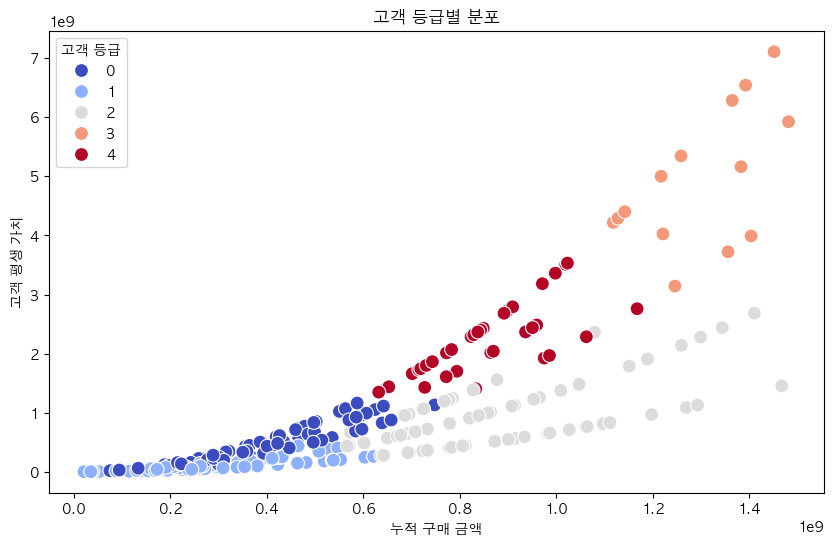

In [204]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x=df['누적 구매 금액'], y=df['고객 평생 가치'], hue=df['클러스터'], palette='coolwarm', s=100)
plt.title('고객 등급별 분포')
plt.xlabel('누적 구매 금액')
plt.ylabel('고객 평생 가치')
plt.legend(title='고객 등급')
plt.show()


In [205]:
# 4가 제일 높은 등급이여야 하는데 3이랑 4가 바뀜

### 다시 / 누적 구매 금액->최근 거래 금액, 마지막 구매 이후 경과 기간, 신차 구매지수를 추가

In [206]:
dt=df[['최근 거래 금액','마지막 구매 이후 경과 기간','신차 구매 지수','고객 충성도 지수','차량 구매 횟수','고객 평생 가치']]

In [207]:
dt

,최근 거래 금액,마지막 구매 이후 경과 기간,신차 구매 지수,고객 충성도 지수,차량 구매 횟수,고객 평생 가치
0,33910000,350,0,38,1,779930
1,84180000,38,0,99,5,23907120
2,71720000,10,0,60,1,3442560
3,51230000,689,0,33,1,1793050
4,49040000,536,0,35,1,1618320
...,...,...,...,...,...,...
286,89230000,90,0,72,2,907252920
287,38690000,574,0,62,3,1063859600
288,71140000,433,0,50,2,950938230
289,83950000,415,0,45,2,1226832750


In [208]:
# 데이터 정규화
scaler=StandardScaler()
dt_scaled=scaler.fit_transform(dt)

In [209]:
dt_scaled

array([[-1.12883419, -0.06543343, -0.2896607 , -1.32773947, -1.17178273,
        -0.73561365],
       [ 1.40199109, -1.51089126,  0.11158474,  2.2228335 ,  1.48699913,
        -0.71652645],
       [ 0.77469682, -1.64061184, -0.15591222, -0.04720496, -1.17178273,
        -0.73341614],
       ...,
       [ 0.74549692,  0.31909542, -0.21535599, -0.6292661 , -0.50708726,
         0.04856545],
       [ 1.39041182,  0.23570362, -0.1856341 , -0.92029667, -0.50708726,
         0.2762651 ],
       [ 1.46139777, -0.45922803, -0.12619034,  1.23332956,  1.48699913,
         0.80162798]])

In [210]:
# kmeans 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['클러스터'] = kmeans.fit_predict(dt_scaled)

In [211]:
cluster_summary = df.groupby('클러스터')[['최근 거래 금액','마지막 구매 이후 경과 기간','신차 구매 지수','고객 충성도 지수','차량 구매 횟수','고객 평생 가치']].mean()

In [212]:
cluster_summary

,최근 거래 금액,마지막 구매 이후 경과 기간,신차 구매 지수,고객 충성도 지수,차량 구매 횟수,고객 평생 가치
클러스터,,,,,,
0,"79,900,303",390,0,50,2,"499,554,150"
1,"54,597,684",267,0,77,4,"885,771,585"
2,"48,400,000",22,1,97,5,"1,743,954,360"
3,"55,992,857",433,0,74,4,"3,786,512,818"
4,"42,735,149",423,0,48,2,"343,702,958"


In [213]:
pd.options.display.float_format = '{:,.0f}'.format


In [214]:
cluster_summary

,최근 거래 금액,마지막 구매 이후 경과 기간,신차 구매 지수,고객 충성도 지수,차량 구매 횟수,고객 평생 가치
클러스터,,,,,,
0,"79,900,303",390,0,50,2,"499,554,150"
1,"54,597,684",267,0,77,4,"885,771,585"
2,"48,400,000",22,1,97,5,"1,743,954,360"
3,"55,992,857",433,0,74,4,"3,786,512,818"
4,"42,735,149",423,0,48,2,"343,702,958"


In [215]:
# 1. 클러스터별 평균값을 고객 평생 가치 기준으로 정렬
cluster_summary.sort_values(by='고객 평생 가치', ascending=False).index

Index([3, 2, 1, 0, 4], dtype='int32', name='클러스터')

In [216]:
cluster_mapping = {old: new for new, old in enumerate(sorted_clusters)}

In [217]:
cluster_mapping

{3: 0, 2: 1, 1: 2, 0: 3, 4: 4}

In [218]:
# 변경
df['클러스터'] = df['클러스터'].map(cluster_mapping)

In [219]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,차량 구매 횟수,신차 구매 지수,고객 평생 가치,고객 그룹,구매 시즌,구매 요일,고객 충성도 지수,등급,group,클러스터
0,1,강주온,2002.3.4,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,1,0,779930,EVC,봄,3,38,이탈가능,0,4
1,2,김경수,1983.1.2,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,5,0,23907120,EVC,겨울,0,99,vip,0,2
2,3,김다은,1999.5.2,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,1,0,3442560,EVC,봄,0,60,신규,0,3
3,4,김민수,1960.7.1,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,1,0,1793050,EVC,봄,0,33,이탈가능,0,4
4,5,김승현,1970.3.2,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,1,0,1618320,EVC,가을,6,35,이탈가능,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958.7.11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,2,0,907252920,BVC,겨울,4,72,일반,1,3
287,289,최춘자,1976.6.27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,3,0,1063859600,BVC,여름,3,62,일반,1,4
288,290,차서준,1968.1.22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,2,0,950938230,BVC,겨울,4,50,이탈가능,1,3
289,291,안정희,1984.1.10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,2,0,1226832750,BVC,겨울,1,45,이탈가능,4,3


In [220]:
df.groupby('클러스터')[['최근 거래 금액','마지막 구매 이후 경과 기간','신차 구매 지수','고객 충성도 지수','차량 구매 횟수','고객 평생 가치']].mean()

,최근 거래 금액,마지막 구매 이후 경과 기간,신차 구매 지수,고객 충성도 지수,차량 구매 횟수,고객 평생 가치
클러스터,,,,,,
0,"55,992,857",433,0,74,4,"3,786,512,818"
1,"48,400,000",22,1,97,5,"1,743,954,360"
2,"54,597,684",267,0,77,4,"885,771,585"
3,"79,900,303",390,0,50,2,"499,554,150"
4,"42,735,149",423,0,48,2,"343,702,958"
